In [7]:
import numpy as np
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

%matplotlib inline
pd.options.display.max_colwidth = 1000

### Kaggle's "Predicting Excitement at DonorsChoose.org"

In [8]:
#donations.csv - contains information about the donations to each project
donations=pd.read_csv('donations.csv')
donations.head()

,donationid,projectid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,...,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
0,431d720bc3dfd75ae445a5eaa0b0638d,ffffac55ee02a49d1abc87ba6fc61135,22cbc920c9b5fa08dfb331422f5926b5,Peachtree City,GA,30269.0,f,2011-08-25 14:27:34.807,42.50,7.50,...,10_to_100,t,no_cash_received,f,t,f,f,f,f,"I gave to this project because I support the efforts of this teacher with each of her students, and her school, Suder Elementary School."
1,fcfedba1c8a0ba77d280cace80a909f6,ffffac55ee02a49d1abc87ba6fc61135,521f1830a77c9dbbf8119d99c6206a16,NaN,GA,NaN,f,2011-11-04 07:54:21.552,26.83,4.73,...,10_to_100,t,creditcard,f,t,f,f,f,f,I donated because I want to support kids in Georgia.
2,3fa95d29986aa6f401c6719ced3a3ce7,ffffac55ee02a49d1abc87ba6fc61135,1e0a63fc8141c7ba26b8b44ca0871b90,Rockville,MD,20853.0,f,2011-11-02 22:53:53.019,55.35,0.00,...,10_to_100,f,no_cash_received,t,f,f,f,t,f,"The Spark's 'pet' projects include those which support deaf students. With just a few days left, the Spark's donors fund half of what remains, and challenge others to pull this project through to fruition."
3,020ad6bd5e88a35741d23b5e08f8b8e8,ffffac55ee02a49d1abc87ba6fc61135,1d4acb508df29d5f1cc6d382969576cb,Salem,IN,47167.0,f,2011-11-03 23:54:01.109,8.50,1.50,...,10_to_100,t,paypal,f,f,f,f,f,f,I gave to this project because Education is important and any method that makes it more fun and effective is worthwhile.
4,4b44b03f304d6425ae94446686f93cd6,ffffac55ee02a49d1abc87ba6fc61135,59c3c3cfcccc53ae855f7eee911c478b,anonymous,NaN,0.0,f,2011-11-02 23:21:00.043,20.00,0.00,...,10_to_100,f,no_cash_received,f,f,t,f,t,f,"I lent a paw to help the children in this classroom in Georgia Together we can all work together to help change the life of a child forever. Please help the children, it will mean the world to them to know you care. Thank you."


In [9]:
#essays.csv - contains project text posted by the teachers     
essays=pd.read_csv('essays.csv')
essays.head()

,projectid,teacher_acctid,title,short_description,need_statement,essay
0,ffffc4f85b60efc5b52347df489d0238,c24011b20fc161ed02248e85beb59a90,iMath,"It is imperative that teachers bring technology into the classroom, if students are going to be able to survive in the 21st Century. The classroom needs to be ever changing along with the outside world. The iMath project will help students by obtaining classroom subject...",My students need four iPods.,"I am a fourth year fifth grade math teacher. The school I teach in is a fifth and sixth grade public school and is a Title One school which means that 95% of our students get free lunch. Presently, I am in the process of completing a Masters degree in Technology in Education through Lesley University. My coursework through Lesley University is allowing me to continue to be a lifelong learner and allow my students to learn in an environment that they can be successful in. Technology has a huge impact on my students' involvement in the classroom. I would like the opportunity to introduce more technology in the classroom, but I need the help of wonderful people like you. \r\n\r\nI would like to introduce to my students the program I call iMath. Through the iMath program I would integrate iPods into my math curriculum. It would allow students to practice their math facts, construct projects, create podcasts, listen to tests, and review lessons. iPods would allow my students to learn on..."
1,ffffac55ee02a49d1abc87ba6fc61135,947066d0af47e0566f334566553dd6a6,Recording Rockin' Readers,Can you imagine having to translate everything you read into sign language and relate it to what you already know? Help us do just that by giving us the camera that will record our stories and...,My students need a camcorder.,"Can you imagine having to translate everything you read into sign language and relate it to what you already know? Help us do just that by giving us the camera that will record our stories and interpretations! \r\n\r\nMy students are all deaf or hard of hearing who are struggling to master reading and language skills at the same time. My students have varying levels of benefit from hearing aids or cochlear implants, and they are all using sign language either for language support or for full communication. In addition to being deaf, my students are also in a Title 1 school in a Title 1 county. \r\n\r\nThis easy to use video camera will help our students to support reading by helping us record translations of the stories, real life items, and sign language interpretations. The video element will help support reading and language skills in a form that my students can more easily relate to and learn from. \r\n\r\nDonations to this project will be extremely beneficial to supporting s..."
2,ffff97ed93720407d70a2787475932b0,462270f5d5c212162fcab11afa2623cb,Kindergarten In Need of Important Materials!,"It takes a special person to donate to a group of children they don't know, especially in these hard economic times, but my students are worth it. They deserve to have the proper supplies to ensure that their long education gets off to the right start, such as chart...",My students need 17 assorted classroom materials to ensure that they can learn as much as possible this year.,"Hi. I teach a wonderful group of 4-5 year old Kindergarten students. They come in wanting and willing to learn new and exciting things each and every day. I work hard to ensure that my students get the most out of the entire school year. \r\n\r\nFor the most part, this is the first academic experiences my students have. That's why it is vitally important to ensure that they keep the excitement and joy for learning throughout the entire school year and take it with them to first grade. To ensure this happens, there are certain supplies that every classroom needs. \r\n\r\nUnfortunately, with past and present budget cuts, supplies are not readily available. This makes it increasingly difficult to ensure that my students can c

In [29]:
#projects.csv - contains information about each project
projects=pd.read_csv('projects.csv')
projects.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,6.362701e+10,36.576340,-119.608713,Selma,CA,93662.0,NaN,...,Books,highest poverty,Grades 6-8,30.0,555.81,653.89,32.0,f,f,2014-05-12
1,90de744e368a7e4883223ca49318ae30,864eb466462bf704bf7a16a585ef296a,d711e47810900c96f26a5d0be30c446d,4.837020e+11,32.911179,-96.723640,Dallas,TX,75243.0,urban,...,Books,highest poverty,Grades PreK-2,30.0,296.47,348.79,22.0,f,f,2014-05-12
2,32943bb1063267de6ed19fc0ceb4b9a7,37f85135259ece793213aca9d8765542,665c3613013ba0a66e3a2a26b89f1b68,4.103270e+11,45.166039,-122.414576,Colton,OR,97017.0,rural,...,Technology,high poverty,Grades PreK-2,30.0,430.89,506.93,17.0,f,f,2014-05-11
3,bb18f409abda2f264d5acda8cab577a9,2133fc46f951f1e7d60645b0f9e48a6c,4f12c3fa0c1cce823c7ba1df57e90ccb,3.600153e+11,40.641727,-73.965655,Brooklyn,NY,11226.0,urban,...,Books,highest poverty,Grades 3-5,30.0,576.07,677.73,12.0,f,f,2014-05-11
4,24761b686e18e5eace634607acbcc19f,867ff478a63f5457eaf41049536c47cd,10179fd362d7b8cf0e89baa1ca3025bb,6.227100e+10,34.043939,-118.288371,Los Angeles,CA,90006.0,urban,...,Other,highest poverty,Grades PreK-2,30.0,408.40,480.47,24.0,f,f,2014-05-11


In [30]:
#resources.csv - contains information about the resources requested for each project
resources=pd.read_csv('resources.csv')
resources.head()

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
0,8a1c1c45bc30d065061912fd9114fcf3,ffffc4f85b60efc5b52347df489d0238,430.0,Woodwind and Brasswind,Technology,iPod nano 4th Gen 8GB (Black),249995.001,149.00,4.0
1,015d2c4935c50427964a12dc3f584091,ffffac55ee02a49d1abc87ba6fc61135,82.0,Best Buy for Business,Technology,Sony bloggie MHS-FS1 - camcorder - internal flash memory,BB11216668,148.00,1.0
2,26a02944b2f0c25f9abdeacca3ede3ee,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,VX748 - Best-Buy Jumbo Crayons - 12-Color Box,VX748,69.95,1.0
3,7fef1f92cb4447d18d599f69ea27e833,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,LA138 - Best-Buy Write & Wipe Broad-Tip Markers - Class Pack,LA138,34.95,1.0
4,8dccf77df25ee615bb1a68b98ba9d861,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,BJ7471 - 1 1/2&#34; Ruled Chart Tablet,BJ7471,10.95,4.0


In [27]:
#outcomes.csv - contains information about the outcomes of projects in the training set
outcomes=pd.read_csv('outcomes.csv')
outcomes.head()

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0


In [31]:
#Merge tables
new = pd.merge(outcomes,projects,on="projectid",how="inner")
dd = pd.merge(new,donationSummary,left_on="projectid", right_index=True,how='inner')


### Exploratory analysis

In [20]:
sum(outcomes['is_exciting']=='t')/outcomes['is_exciting'].shape[0]

0.05927411411760527

Only 5.9% of the projects in the outcomes.csv are classified as "Exciting"

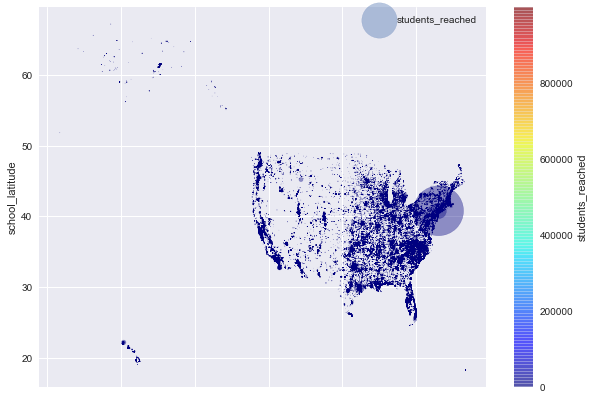

In [34]:
projects.plot(kind="scatter", x="school_longitude", y="school_latitude",c='students_reached',
              s=projects['total_price_including_optional_support']/5000,
              cmap=plt.get_cmap("jet"),
              label="students_reached",colorbar=True, alpha=0.4, figsize=(10,7))
plt.legend()
plt.show()

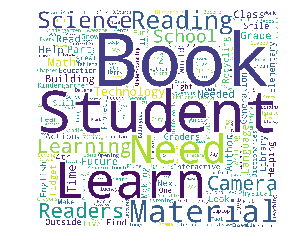

Wordcloud of projects description 


In [25]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(stopwords=STOPWORDS,background_color='white',
               width=4000,height=3600).generate(" ".join(essays['title'][0:100]))
plt.imshow(wc)
plt.axis('off')
plt.show()
print("Wordcloud of projects description ")

In [24]:
essays['title'][4071]

'Reading Corner!'

### A Data Story

### Questions for the Project Partner

### Modeling 